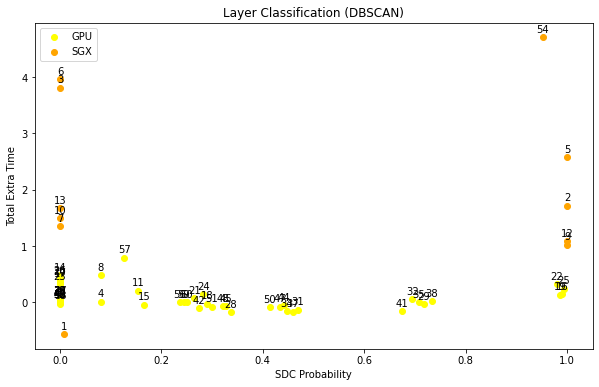

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define the data (same as before)
data = [
    [1, 0.0079, -0.5643],
    [2, 0.9999, 1.7175],
    [3, 0.0002, 3.8152],
    [4, 0.0814, 0.0069],
    [5, 0.9999, 2.5731],
    [6, 0.0002, 3.9653],
    [7, 0.0011, 1.3520],
    [8, 0.0804, 0.4786],
    [9, 0.9998, 1.0260],
    [10, 0.0002, 1.4964],
    [11, 0.1544, 0.2062],
    [12, 0.9999, 1.0822],
    [13, 0.0002, 1.6699],
    [14, 0.0010, 0.4755],
    [15, 0.1658, -0.0454],
    [16, 0.9906, 0.1444],
    [17, 0.0002, 0.3675],
    [18, 0.2899, -0.0284],
    [19, 0.9853, 0.1359],
    [20, 0.0002, 0.4046],
    [21, 0.2652, 0.0674],
    [22, 0.9793, 0.3195],
    [23, 0.0002, 0.3221],
    [24, 0.2826, 0.1389],
    [25, 0.9929, 0.2419],
    [26, 0.0002, 0.4186],
    [27, 0.0008, 0.0714],
    [28, 0.3364, -0.1794],
    [29, 0.7175, -0.0360],
    [30, 0.0002, 0.0602],
    [31, 0.4685, -0.1334],
    [32, 0.6945, 0.0490],
    [33, 0.0002, 0.0645],
    [34, 0.4478, -0.1645],
    [35, 0.7073, -0.0019],
    [36, 0.0002, 0.0460],
    [37, 0.4588, -0.1717],
    [38, 0.7331, 0.0203],
    [39, 0.0002, 0.0617],
    [40, 0.0007, 0.0365],
    [41, 0.6738, -0.1557],
    [42, 0.2748, -0.1019],
    [43, 0.0002, 0.0195],
    [44, 0.4420, -0.0491],
    [45, 0.3279, -0.0756],
    [46, 0.0002, -0.0009],
    [47, 0.4344, -0.0785],
    [48, 0.3210, -0.0722],
    [49, 0.0002, -0.0036],
    [50, 0.4136, -0.0913],
    [51, 0.2990, -0.0768],
    [52, 0.0002, 0.0009],
    [53, 0.0006, -0.0274],
    [54, 0.9523, 4.7070],
    [55, 0.0001, -0.0041],
    [56, 0.2358, -0.0012],
    [57, 0.1273, 0.7892],
    [58, 0.0002, 0.0026],
    [59, 0.2438, 0.0009],
    [60, 0.2500, -0.0018]
]

# Extract layer numbers and features
layer_numbers = [row[0] for row in data]
features = np.array([[row[1], row[2]] for row in data])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(features)
labels = dbscan.labels_

# Plot the results
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = ['yellow', 'orange', 'blue', 'green', 'red', 'purple', 'pink', 'brown', 'olive', 'cyan']

for label, color in zip(unique_labels, colors):
    if label == 0:
        label_name = 'GPU'
        color = 'yellow'
    elif label == -1:
        label_name = 'SGX'
        color = 'orange'
    else:
        label_name = f'Cluster {label}'
    
    mask = (labels == label)
    plt.scatter(features[mask, 0], features[mask, 1], color=color, label=label_name)
    
    for i, layer_number in enumerate(layer_numbers):
        if mask[i]:
            plt.annotate(layer_number, (features[i, 0], features[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('SDC Probability')
plt.ylabel('Total Extra Time')
plt.title('Layer Classification (DBSCAN)')
plt.legend()
plt.savefig('DBSCAN.png',dpi = 300)
plt.show()
